In [1]:
import numpy as np
import matplotlib.pyplot as plt

emotion_data = np.load('D:\One_한양대학교\private object minsu\coding\data\samsung_2024\emotion\emotion_data.npy')
emotion_label = np.load('D:\One_한양대학교\private object minsu\coding\data\samsung_2024\emotion\emotion_label.npy')

In [45]:
new_emotion_label = emotion_label[:,1:]
new_emotion_label = np.stack([new_emotion_label[:,:,0]>2,new_emotion_label[:,:,1]>2], axis=2, dtype=int)
print(np.sum(new_emotion_label[:,:,0]==0),np.sum(new_emotion_label[:,:,0]==1))
print(np.sum(new_emotion_label[:,:,1]==0),np.sum(new_emotion_label[:,:,1]==1),'\n')

for i in range(4):
    print(np.sum(new_emotion_label[:,i*2:i*2+2,0]==0),np.sum(new_emotion_label[:,i*2:i*2+2,0]==1))
print()
for i in range(4):
    print(np.sum(new_emotion_label[:,i*2:i*2+2,1]==0),np.sum(new_emotion_label[:,i*2:i*2+2,1]==1))

117 139
107 149 

40 24
36 28
17 47
24 40

4 60
2 62
53 11
48 16


In [11]:
emotion_data[h > 1].shape

(28, 9, 8, 15000)

In [19]:
sum(h>1)

28

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False, False])

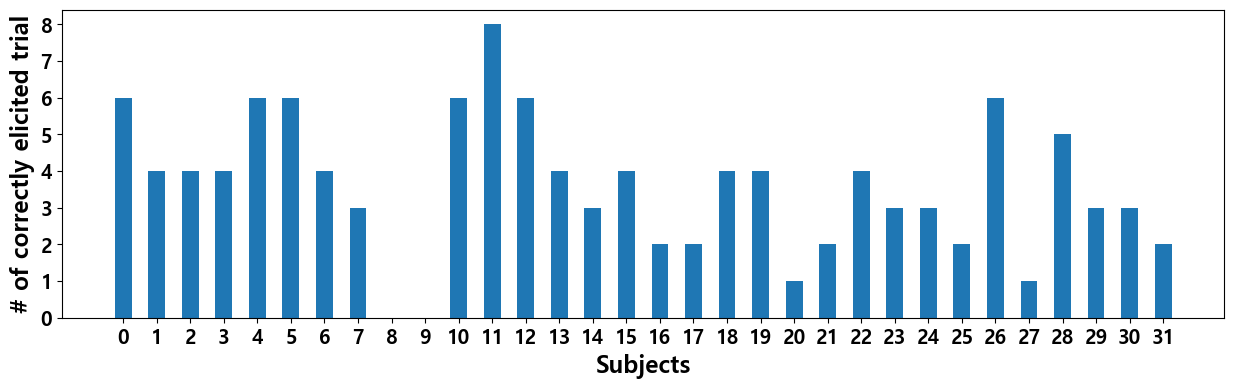

In [6]:
new_emotion_label = emotion_label[:,1:]
h = np.zeros((32,),int)
h += (new_emotion_label[:,0,0].T > 2) & (new_emotion_label[:,0,1].T > 2)
h += (new_emotion_label[:,1,0].T > 2) & (new_emotion_label[:,1,1].T > 2)
h += (new_emotion_label[:,2,0].T < 3) & (new_emotion_label[:,2,1].T > 2)
h += (new_emotion_label[:,3,0].T < 3) & (new_emotion_label[:,3,1].T > 2)
h += (new_emotion_label[:,4,0].T > 2) & (new_emotion_label[:,4,1].T < 3)
h += (new_emotion_label[:,5,0].T > 2) & (new_emotion_label[:,5,1].T < 3)
h += (new_emotion_label[:,6,0].T < 3) & (new_emotion_label[:,6,1].T < 3)
h += (new_emotion_label[:,7,0].T < 3) & (new_emotion_label[:,7,1].T < 3)
h
# p = (new_emotion_label[:,0,0].T > 2) & (new_emotion_label[:,1,0].T > 2)
plt.figure(figsize=(15,4))
plt.bar(np.arange(0,32,1), h, 0.5)
plt.xticks(np.arange(0,32,1), fontweight='bold', fontsize='x-large', fontfamily='Malgun Gothic')
plt.yticks(np.arange(0,9,1), fontweight='semibold',fontsize='x-large', fontfamily='Malgun Gothic')
plt.ylabel("# of correctly elicited trial", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
plt.xlabel("Subjects", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
# .legend(['Arousal','Valence'], fontsize='x-large')
np.where(h < 3)
h > 3

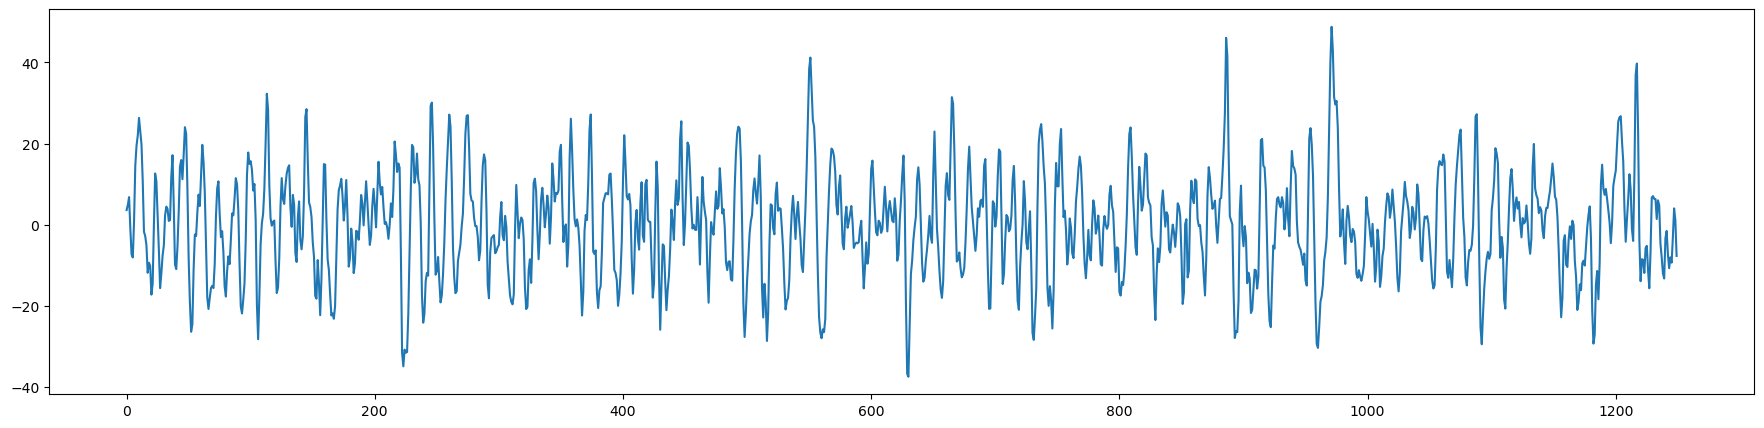

In [9]:
plt.figure(figsize=(22,5))
plt.plot(emotion_data[0,0,0,125*110:]/1000)

117 139
107 149 

21 43
55 9
4 60
37 27

1 63
5 59
60 4
41 23


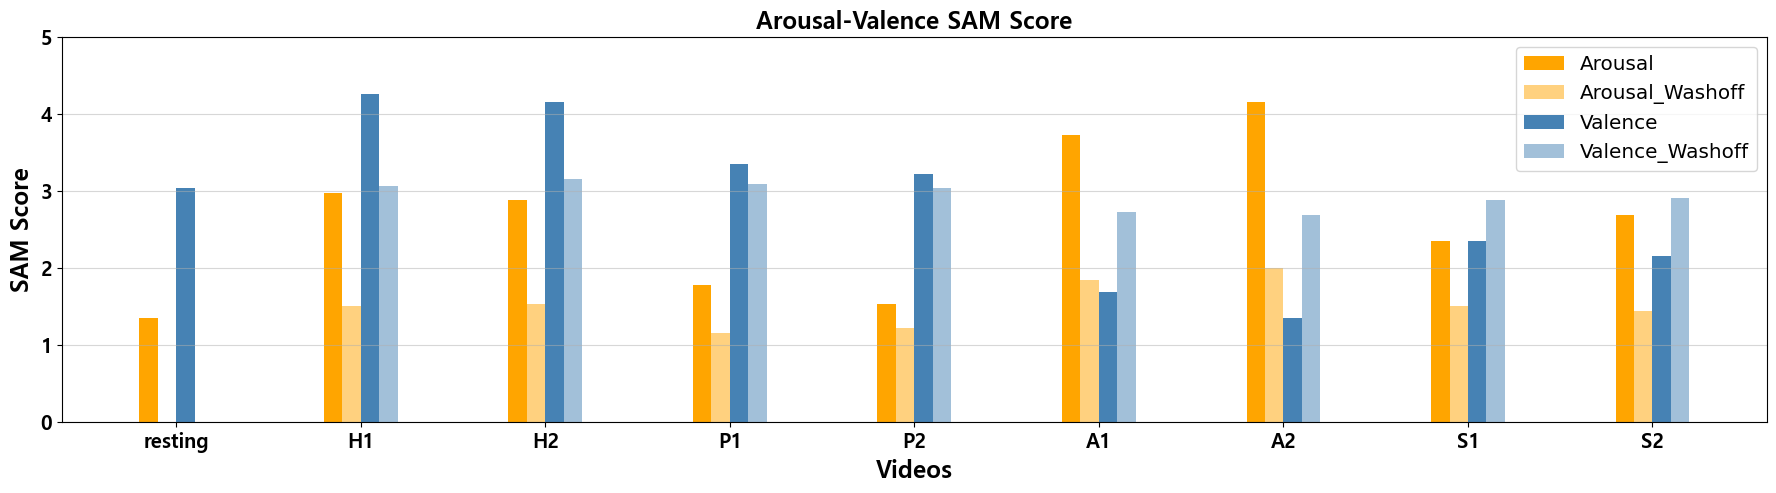

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

def Plot_Emotion_Label_Distribution():
    ROOT_PATH = r'D:/One_한양대학교/private object minsu/coding/data/samsung_2024/Day 1/'
    subj_list = os.listdir(ROOT_PATH)
    videos = ['resting','H1','H2','P1','P2','A1','A2','S1','S2']
    num_videos = len(videos)

    emotion_label_ = np.zeros((len(subj_list), num_videos, 4), int)
    for idx, subj in enumerate(subj_list):
        dat_list = os.listdir(ROOT_PATH + subj)

        label_raw = pd.read_csv(ROOT_PATH + subj + '/' + [s for s in dat_list if 'Emotion' in s][0])
        emotion_label_[idx,:,:2] = np.array(label_raw[videos][:2]).T
        emotion_label_[idx,1:,2:] = np.array(label_raw[['H1w','H2w','P1w','P2w','A1w','A2w','S1w','S2w']][:2]).T

    new_emotion_label = emotion_label_[:,1:,:2] # 32, 8, 2
    # print(new_emotion_label[:,0:2,0])
    new_emotion_label = np.stack([new_emotion_label[:,:,0]>2,new_emotion_label[:,:,1]>2], axis=2, dtype=int)
    print(np.sum(new_emotion_label[:,:,0]==0),np.sum(new_emotion_label[:,:,0]==1))
    print(np.sum(new_emotion_label[:,:,1]==0),np.sum(new_emotion_label[:,:,1]==1),'\n')

    for i in range(4):
        print(np.sum(new_emotion_label[:,i*2:i*2+2,0]==0),np.sum(new_emotion_label[:,i*2:i*2+2,0]==1))
    print()
    for i in range(4):
        print(np.sum(new_emotion_label[:,i*2:i*2+2,1]==0),np.sum(new_emotion_label[:,i*2:i*2+2,1]==1))
    

    plt.figure(figsize=(22,5))
    bar_width = 0.1
    index = np.arange(0,num_videos,1)

    mean_emotion_label = np.mean(emotion_label_,0)
    std_emotion_label = np.std(emotion_label_,0)

    plt.grid(axis='y',alpha=.5)
    bar1 = plt.bar(index - bar_width, mean_emotion_label[:,0], bar_width, alpha=1, color = 'orange', label = 'Arousal')# , yerr=std_emotion_label[:,0])
    bar3 = plt.bar(index, mean_emotion_label[:,2], bar_width, alpha=.5, color = 'orange', label = 'Arousal_Washoff')# , yerr=std_emotion_label[:,2])
    bar2 = plt.bar(index + bar_width, mean_emotion_label[:,1], bar_width, alpha=1, color = 'steelblue', label = 'Valence')# , yerr=std_emotion_label[:,1])
    bar4 = plt.bar(index + bar_width*2, mean_emotion_label[:,3], bar_width, alpha=.5, color = 'steelblue', label = 'Valence_Washoff')# , yerr=std_emotion_label[:,3])
    plt.xticks(np.arange(bar_width/2, num_videos+bar_width/2, 1), videos, fontweight='bold', fontsize='x-large', fontfamily='Malgun Gothic')
    plt.yticks(np.arange(0,6,1), fontweight='semibold',fontsize='x-large', fontfamily='Malgun Gothic')
    plt.title('Arousal-Valence SAM Score', fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.ylabel("SAM Score", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.xlabel("Videos", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.legend(['Arousal','Arousal_Washoff','Valence','Valence_Washoff'], fontsize='x-large')

Plot_Emotion_Label_Distribution()

48 69 65 45 29
43 64 70 56 23 

6 15 26 12 5
32 23 8 1 0
1 3 17 21 22
9 28 14 11 2

0 1 7 34 22
0 5 37 21 1
36 24 3 1 0
7 34 23 0 0


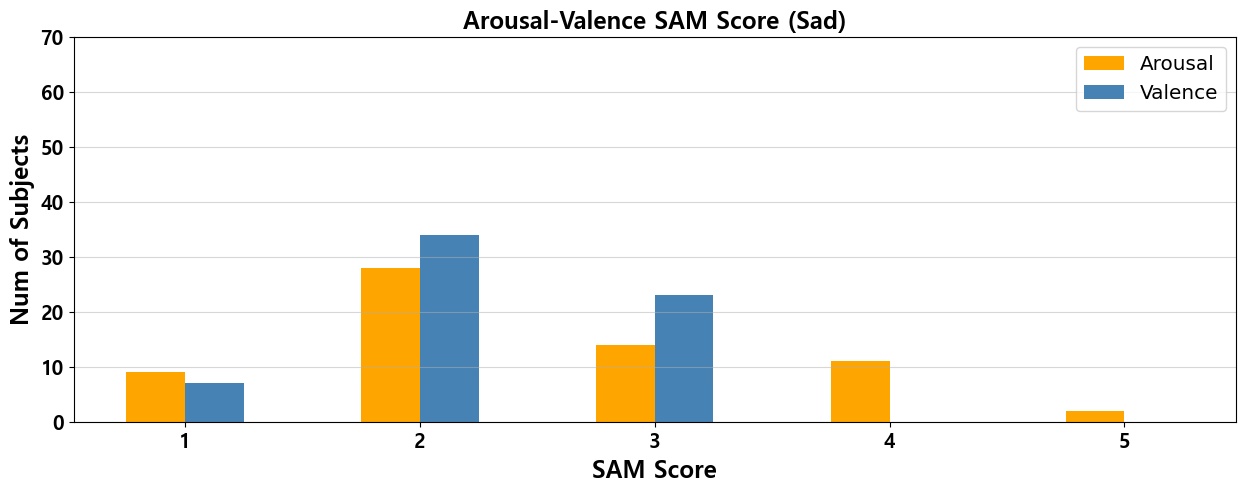

In [26]:
def Plot_Emotion_Label_Distribution2():
    ROOT_PATH = r'D:/One_한양대학교/private object minsu/coding/data/samsung_2024/Day 1/'
    subj_list = os.listdir(ROOT_PATH)
    videos = ['resting','H1','H2','P1','P2','A1','A2','S1','S2']
    num_videos = len(videos)

    emotion_label_ = np.zeros((len(subj_list), num_videos, 4), int)
    for idx, subj in enumerate(subj_list):
        dat_list = os.listdir(ROOT_PATH + subj)

        label_raw = pd.read_csv(ROOT_PATH + subj + '/' + [s for s in dat_list if 'Emotion' in s][0])
        emotion_label_[idx,:,:2] = np.array(label_raw[videos][:2]).T
        emotion_label_[idx,1:,2:] = np.array(label_raw[['H1w','H2w','P1w','P2w','A1w','A2w','S1w','S2w']][:2]).T

    new_emotion_label = emotion_label_[:,1:,:2] # 32, 8, 2
    # print(new_emotion_label[:,0:2,0])
    new_emotion_label = np.stack([new_emotion_label[:,:,0],new_emotion_label[:,:,1]], axis=2, dtype=int)
    print(np.sum(new_emotion_label[:,:,0]==1),np.sum(new_emotion_label[:,:,0]==2),np.sum(new_emotion_label[:,:,0]==3),np.sum(new_emotion_label[:,:,0]==4),np.sum(new_emotion_label[:,:,0]==5))
    print(np.sum(new_emotion_label[:,:,1]==1),np.sum(new_emotion_label[:,:,1]==2),np.sum(new_emotion_label[:,:,1]==3),np.sum(new_emotion_label[:,:,1]==4),np.sum(new_emotion_label[:,:,1]==5),'\n')
    all_a = [np.sum(new_emotion_label[:,:,0]==1),np.sum(new_emotion_label[:,:,0]==2),np.sum(new_emotion_label[:,:,0]==3),np.sum(new_emotion_label[:,:,0]==4),np.sum(new_emotion_label[:,:,0]==5)]
    all_v = [np.sum(new_emotion_label[:,:,1]==1),np.sum(new_emotion_label[:,:,1]==2),np.sum(new_emotion_label[:,:,1]==3),np.sum(new_emotion_label[:,:,1]==4),np.sum(new_emotion_label[:,:,1]==5)]

    for i in range(4):
        print(np.sum(new_emotion_label[:,i*2:i*2+2,0]==1),np.sum(new_emotion_label[:,i*2:i*2+2,0]==2),np.sum(new_emotion_label[:,i*2:i*2+2,0]==3),np.sum(new_emotion_label[:,i*2:i*2+2,0]==4),np.sum(new_emotion_label[:,i*2:i*2+2,0]==5))

    print()
    for i in range(4):
        print(np.sum(new_emotion_label[:,i*2:i*2+2,1]==1),np.sum(new_emotion_label[:,i*2:i*2+2,1]==2),np.sum(new_emotion_label[:,i*2:i*2+2,1]==3),np.sum(new_emotion_label[:,i*2:i*2+2,1]==4),np.sum(new_emotion_label[:,i*2:i*2+2,1]==5))
    
    i=3
    all_a = [np.sum(new_emotion_label[:,i*2:i*2+2,0]==1),np.sum(new_emotion_label[:,i*2:i*2+2,0]==2),np.sum(new_emotion_label[:,i*2:i*2+2,0]==3),np.sum(new_emotion_label[:,i*2:i*2+2,0]==4),np.sum(new_emotion_label[:,i*2:i*2+2,0]==5)]
    all_v = [np.sum(new_emotion_label[:,i*2:i*2+2,1]==1),np.sum(new_emotion_label[:,i*2:i*2+2,1]==2),np.sum(new_emotion_label[:,i*2:i*2+2,1]==3),np.sum(new_emotion_label[:,i*2:i*2+2,1]==4),np.sum(new_emotion_label[:,i*2:i*2+2,1]==5)]
    plt.figure(figsize=(15,5))
    bar_width = 0.25
    index = np.arange(0,5,1)

    mean_emotion_label = np.mean(emotion_label_,0)
    std_emotion_label = np.std(emotion_label_,0)

    plt.grid(axis='y',alpha=.5)
    bar1 = plt.bar(index - bar_width/2, all_a, bar_width, alpha=1, color = 'orange', label = 'Arousal')# , yerr=std_emotion_label[:,0])
    bar2 = plt.bar(index + bar_width/2, all_v, bar_width, alpha=1, color = 'steelblue', label = 'Valence')# , yerr=std_emotion_label[:,1])
    plt.xticks(np.arange(0, 5, 1), np.arange(1,6,1), fontweight='bold', fontsize='x-large', fontfamily='Malgun Gothic')
    plt.yticks(np.arange(0,80,10), fontweight='semibold',fontsize='x-large', fontfamily='Malgun Gothic')
    plt.title('Arousal-Valence SAM Score (Sad)', fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.ylabel("Num of Subjects", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.xlabel("SAM Score", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.legend(['Arousal','Valence'], fontsize='x-large')

Plot_Emotion_Label_Distribution2()

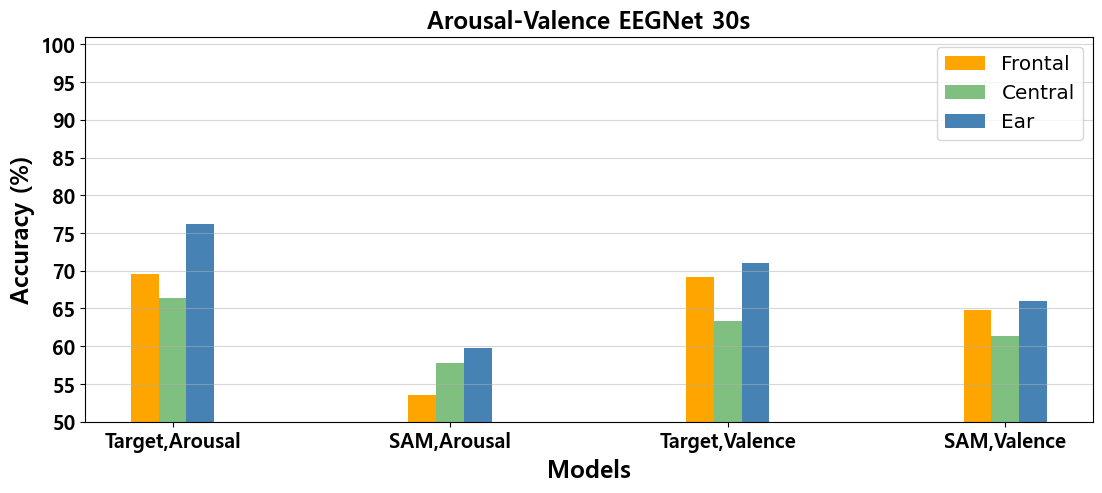

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

def Plot_Classification_Results(r1,r2,r3):

    num_idx = len(r1)
    plt.figure(figsize=(13,5))
    bar_width = 0.1
    index = np.arange(0,num_idx,1)
    videos = ['Target,Arousal','SAM,Arousal','Target,Valence','SAM,Valence']


    plt.grid(axis='y',alpha=.5)
    bar1 = plt.bar(index - bar_width, r1, bar_width, alpha=1, color = 'orange', label = 'Arousal')# , yerr=std_emotion_label[:,0])
    bar3 = plt.bar(index, r2, bar_width, alpha=.5, color = 'green', label = 'Arousal_Washoff')# , yerr=std_emotion_label[:,2])
    bar2 = plt.bar(index + bar_width, r3, bar_width, alpha=1, color = 'steelblue', label = 'Valence')# , yerr=std_emotion_label[:,1])
    plt.xticks(np.arange(0, 4, 1), videos, fontweight='bold', fontsize='x-large', fontfamily='Malgun Gothic')
    plt.yticks(np.arange(50,102,5), fontweight='semibold',fontsize='x-large', fontfamily='Malgun Gothic')
    plt.title('Arousal-Valence EEGNet 30s', fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.ylabel("Accuracy (%)", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.xlabel("Models", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.legend(['Frontal','Central','Ear'], fontsize='x-large')
    plt.ylim(50,101)

# Plot_Classification_Results([72.27, 56.25, 81.25, 81.64], [71.09, 57.03, 71.88, 58.59], [77.34, 62.5, 81.64, 59.38])

# Plot_Classification_Results([72.27, 56.25, 72.66, 65.62], [71.09, 57.03, 68.36, 65.23], [77.34, 62.5, 75.39, 64.84])
Plot_Classification_Results([69.53, 53.52, 69.14, 64.84], [66.40, 57.81, 63.28, 61.33], [76.17, 59.77, 71.09, 66.02])
# Plot_Classification_Results([81.25, 61.33, 74.22, 64.84], [71.88, 58.59, 68.75, 63.28], [81.64, 59.38, 75.39, 61.33])

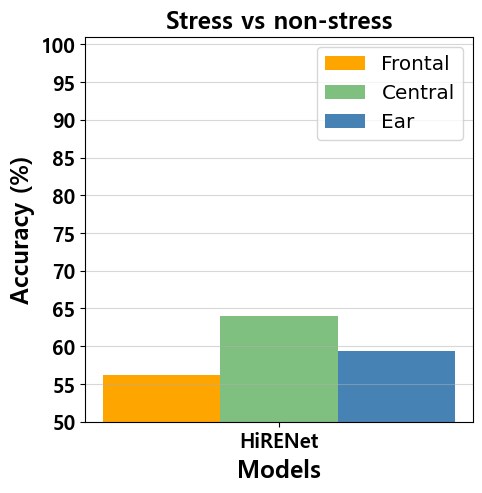

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

def Plot_Classification_Results(r1,r2,r3):

    num_idx = len(r1)
    plt.figure(figsize=(5,5))
    bar_width = 0.1
    index = np.arange(0,num_idx,1)
    videos = ['HiRENet']


    plt.grid(axis='y',alpha=.5)
    bar1 = plt.bar(index - bar_width, r1, bar_width, alpha=1, color = 'orange', label = 'Arousal')# , yerr=std_emotion_label[:,0])
    bar3 = plt.bar(index, r2, bar_width, alpha=.5, color = 'green', label = 'Arousal_Washoff')# , yerr=std_emotion_label[:,2])
    bar2 = plt.bar(index + bar_width, r3, bar_width, alpha=1, color = 'steelblue', label = 'Valence')# , yerr=std_emotion_label[:,1])
    plt.xticks(np.arange(0, 1, 1), videos, fontweight='bold', fontsize='x-large', fontfamily='Malgun Gothic')
    plt.yticks(np.arange(50,102,5), fontweight='semibold',fontsize='x-large', fontfamily='Malgun Gothic')
    plt.title('Stress vs non-stress', fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.ylabel("Accuracy (%)", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.xlabel("Models", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.legend(['Frontal','Central','Ear'], fontsize='x-large')
    plt.ylim(50,101)

# Plot_Classification_Results([72.27, 56.25, 81.25, 81.64], [71.09, 57.03, 71.88, 58.59], [77.34, 62.5, 81.64, 59.38])

# Plot_Classification_Results([72.27, 56.25, 72.66, 65.62], [71.09, 57.03, 68.36, 65.23], [77.34, 62.5, 75.39, 64.84])
# Plot_Classification_Results([69.53, 69.14], [66.40, 63.28], [76.17, 71.09])
Plot_Classification_Results([56.25], [64.06], [59.38])
# Plot_Classification_Results([81.25, 61.33, 74.22, 64.84], [71.88, 58.59, 68.75, 63.28], [81.64, 59.38, 75.39, 61.33])